# IMPORT LIBRARY

In [1]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

from sklearn.metrics import confusion_matrix, classification_report

# IMPORT DATASET

In [3]:
dir = 'E:/SEM9/PCD-IRFAN/DATASET/'

train_dir = os.path.join(dir, 'train')
val_dir = os.path.join(dir, 'val')
test_dir = os.path.join(dir, 'test')

# DATA UNDERSTANDING

In [4]:
# List kelas (subfolder) dalam setiap direktori
classes = os.listdir(train_dir)

# Inisialisasi variabel untuk menyimpan nilai maksimum dan minimum
format_data = ''
max_size_data = (0, 0)
min_size_data = (float('inf'), float('inf'))
channels = 0

for class_name in classes:
    class_dir_train = os.path.join(train_dir, class_name)
    class_dir_val = os.path.join(val_dir, class_name)
    class_dir_test = os.path.join(test_dir, class_name)

    # Menghitung dan menampilkan informasi tentang setiap gambar
    for folder in [class_dir_train, class_dir_val, class_dir_test]:
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path)
            format_data = img.format
            size_data = img.size
            channels = len(img.getbands())

            if size_data > max_size_data:
                max_size_data = size_data
            if size_data < min_size_data:
                min_size_data = size_data

# Menampilkan nilai maksimum dan minimum
print(f'Format Data: {format_data}')
print(f'Max Ukuran Data: {max_size_data}')
print(f'Min Ukuran Data: {min_size_data}')
print(f'Ukuran Channel: {channels}')

Format Data: JPEG
Max Ukuran Data: (256, 256)
Min Ukuran Data: (256, 256)
Ukuran Channel: 3


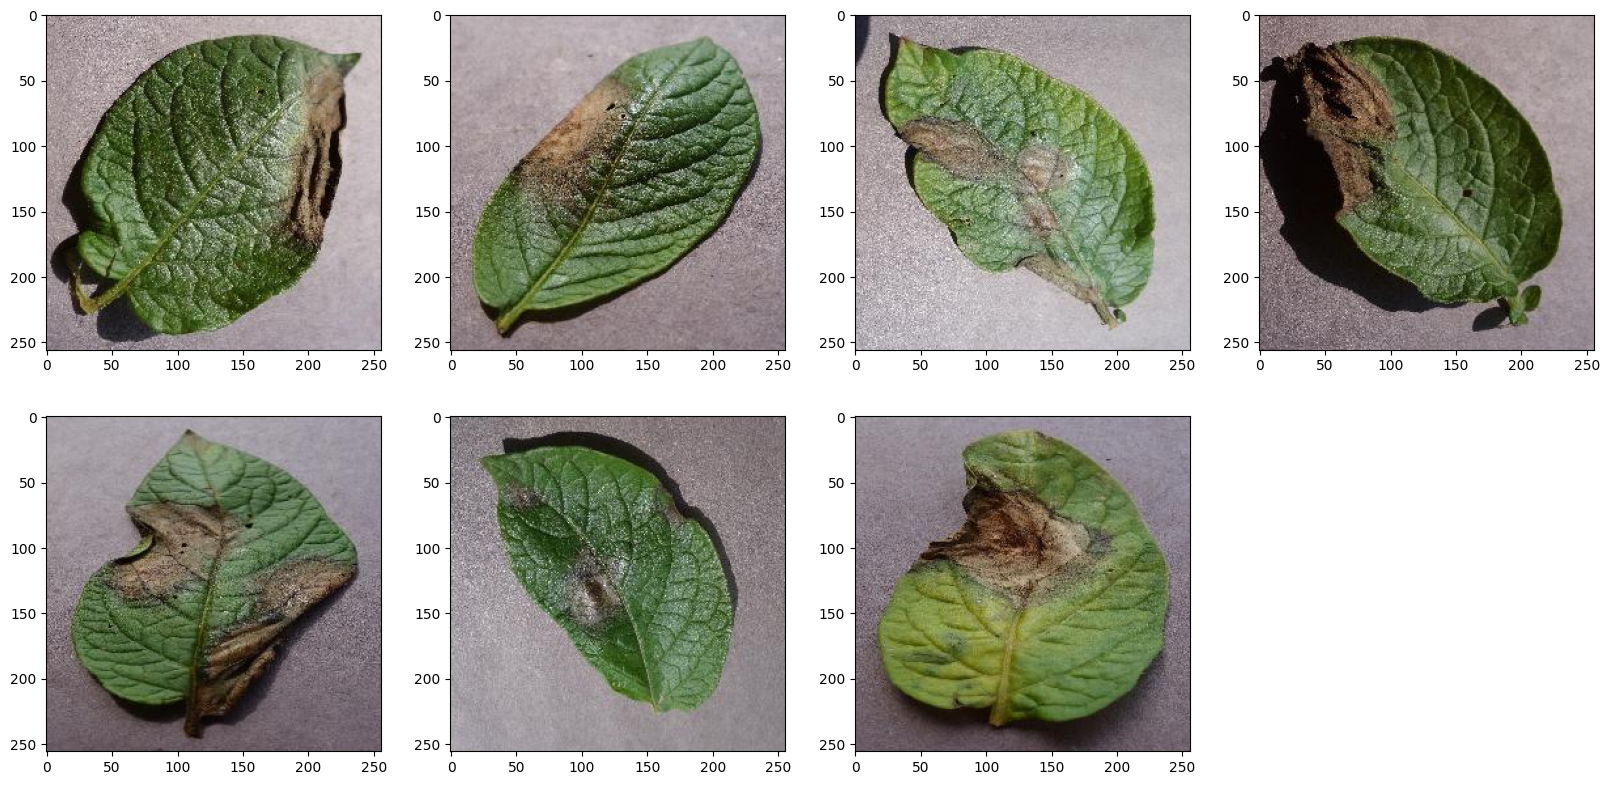

In [6]:
#isi data training
images=os.listdir(train_dir + '/' + 'Potato___Late_blight')
plt.figure(figsize=(20,20))
for i in range(7):
    img = random.choice([x for x in images])
    fig = plt.subplot(4,4,i+1)
    img = mpimg.imread(os.path.join(train_dir + '/' + 'Potato___Late_blight', img))
    fig.imshow(img)

# DATA PREPARATION

In [7]:
IMG_SIZE = 160
BATCH_SIZE = 32

In [8]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=180,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

val_test_gen = ImageDataGenerator(rescale=1./255)


In [9]:
train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE,IMG_SIZE),
    class_mode='categorical',
    shuffle=True
)

val_data = val_test_gen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE,IMG_SIZE),
    class_mode='categorical',
    shuffle=True
)

test_data = val_test_gen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE,IMG_SIZE),
    class_mode='categorical',
    shuffle=False
)

Found 1506 images belonging to 3 classes.
Found 323 images belonging to 3 classes.
Found 323 images belonging to 3 classes.


# MODELLING

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 158, 158, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 158, 158, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 79, 79, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 79, 79, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 77, 77, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 77, 77, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 38, 38, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 38, 38, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 36, 36, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 36, 36, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 586,019 (2.24 MB)

 Trainable params: 585,667 (2.23 MB)

 Non-trainable params: 352 (1.38 KB)

In [14]:
optimizer = RMSprop(learning_rate= 0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [15]:
history = model.fit(
            train_data,
            validation_data=val_data,
            epochs=50)

Epoch 1/50


c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 18s 298ms/step - accuracy: 0.7290 - loss: 2.0828 - val_accuracy: 0.4644 - val_loss: 6.2728
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 301ms/step - accuracy: 0.8775 - loss: 0.3709 - val_accuracy: 0.4644 - val_loss: 10.1530
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 297ms/step - accuracy: 0.8952 - loss: 0.3110 - val_accuracy: 0.4644 - val_loss: 12.5102
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 293ms/step - accuracy: 0.9010 - loss: 0.3087 - val_accuracy: 0.4644 - val_loss: 15.7067
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 292ms/step - accuracy: 0.9077 - loss: 0.2485 - val_accuracy: 0.4644 - val_loss: 17.0522
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 293ms/step - accuracy: 0.9363 - loss: 0.2223 - val_accuracy: 0.4644 - val_loss: 9.3808
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 289ms/step - accuracy: 0.9216 - loss: 0.2119 - val_accuracy: 0.4861 - val_loss: 5.1473
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 287ms/step - accuracy: 0.9278 - loss: 0.1883 - val_accuracy: 0

# EVALUASI

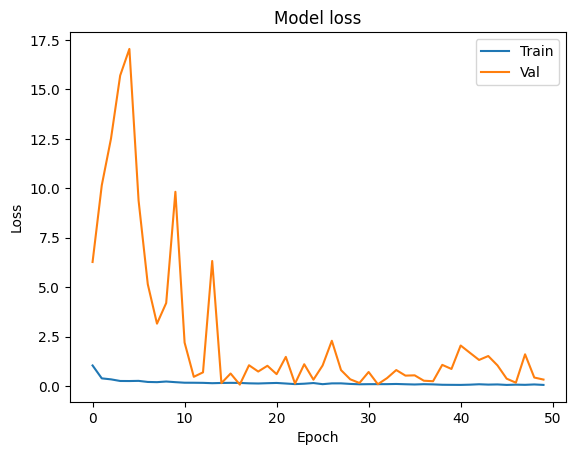

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

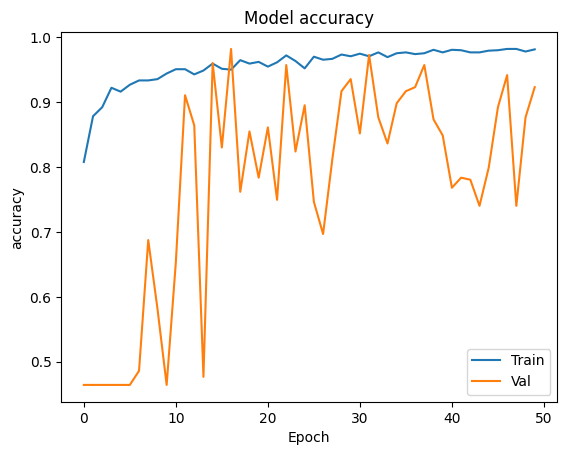

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [18]:
# Prediksi pada data uji
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


In [19]:
# Mendapatkan label sebenarnya
y_true = test_data.classes

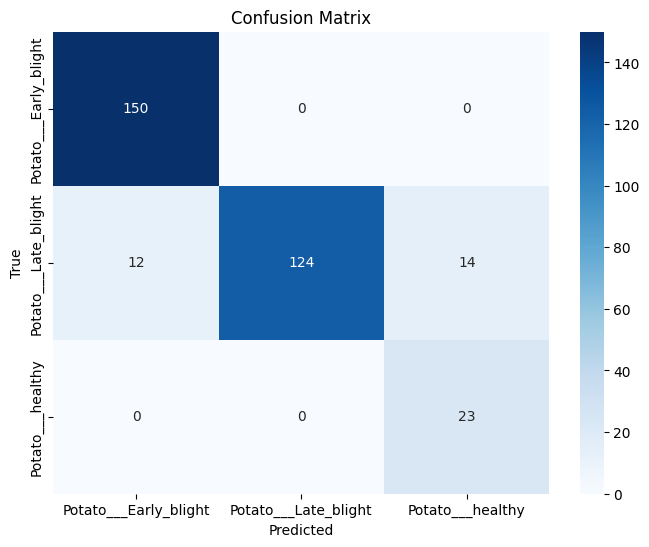

In [20]:
# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Menampilkan confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.class_indices.keys(),
            yticklabels=train_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [21]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       150
           1       1.00      0.83      0.91       150
           2       0.62      1.00      0.77        23

    accuracy                           0.92       323
   macro avg       0.85      0.94      0.88       323
weighted avg       0.94      0.92      0.92       323



In [22]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(train_data)
print('Training accuracy:', train_acc)

48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 314ms/step - accuracy: 0.9680 - loss: 0.0882
Training accuracy: 0.9608233571052551


In [23]:
loss, accuracy = model.evaluate(val_data)
print(f'Akurasi Validasi: {accuracy*100:.2f}%')

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9315 - loss: 0.2868
Akurasi Validasi: 92.26%


<b>CNN Runtime Lebih Lambat</b>
Overviting hasil tester kurang bagus